In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 20}
matplotlib.rc('font', **font)

import seaborn as sns

from pylab import rcParams
rcParams["figure.figsize"] = 30,16

import sklearn
from sklearn import metrics

import numpy as np
import scipy

import datetime as dt
from datetime import date

from collections import OrderedDict

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, "../")
import functions

# <font size="7">Vergleich des Windgeschwindigkeit</font>

In [3]:
#Daten aus jeweiliger CSV-Datei laden
df = pd.read_csv("Datenbeschaffung/kalender.csv", index_col=0, parse_dates=True, usecols=[0,2])
df = df.join(pd.read_csv("Datenbeschaffung/stuttgart.csv", index_col=0, parse_dates=True, usecols=[0,6], squeeze=True).rename("stuttgart"))
df = df.join(pd.read_csv("Datenbeschaffung/freiburg.csv", index_col=0, parse_dates=True, usecols=[0,6], squeeze=True).rename("freiburg"))
df = df.join(pd.read_csv("Datenbeschaffung/mannheim.csv", index_col=0, parse_dates=True, usecols=[0,6], squeeze=True).rename("mannheim"))
df = df.join(pd.read_csv("Datenbeschaffung/ulm.csv", index_col=0, parse_dates=True, usecols=[0,6], squeeze=True).rename("ulm"))

#Durchschnitt berechnen
df["durchschnitt"] = round(((df["stuttgart"] + df["freiburg"] + df["mannheim"] + df["ulm"]) / 4), 1)

print(df)

             wochentag  stuttgart  freiburg  mannheim   ulm  durchschnitt
datum                                                                    
2015-01-01  Donnerstag       10.4      10.4      13.3  10.1          11.0
2015-01-02     Freitag       19.4      16.2      24.8  24.1          21.1
2015-01-03     Samstag       26.6      26.6      15.1  34.2          25.6
2015-01-04     Sonntag       17.6      12.6      13.3  24.8          17.1
2015-01-05      Montag        9.7       7.9       9.0  11.2           9.4
...                ...        ...       ...       ...   ...           ...
2021-12-27      Montag       12.2      13.7      16.2  15.8          14.5
2021-12-28    Dienstag       29.2      25.9      25.6  34.9          28.9
2021-12-29    Mittwoch       27.7      23.0      30.6  38.2          29.9
2021-12-30  Donnerstag       23.4      18.4      22.3  31.3          23.8
2021-12-31     Freitag        7.9       7.9      10.8  11.5           9.5

[2557 rows x 6 columns]


<font size="5">Wie auch bei den anderen Merkmalen ist der Verlauf der Windgeschwindigkeit in den Städten sehr ähnlich. Ausschläge nach oben oder unten sind oft synchron, allerdings stellenweise etwas unterschiedlich stark.</font>

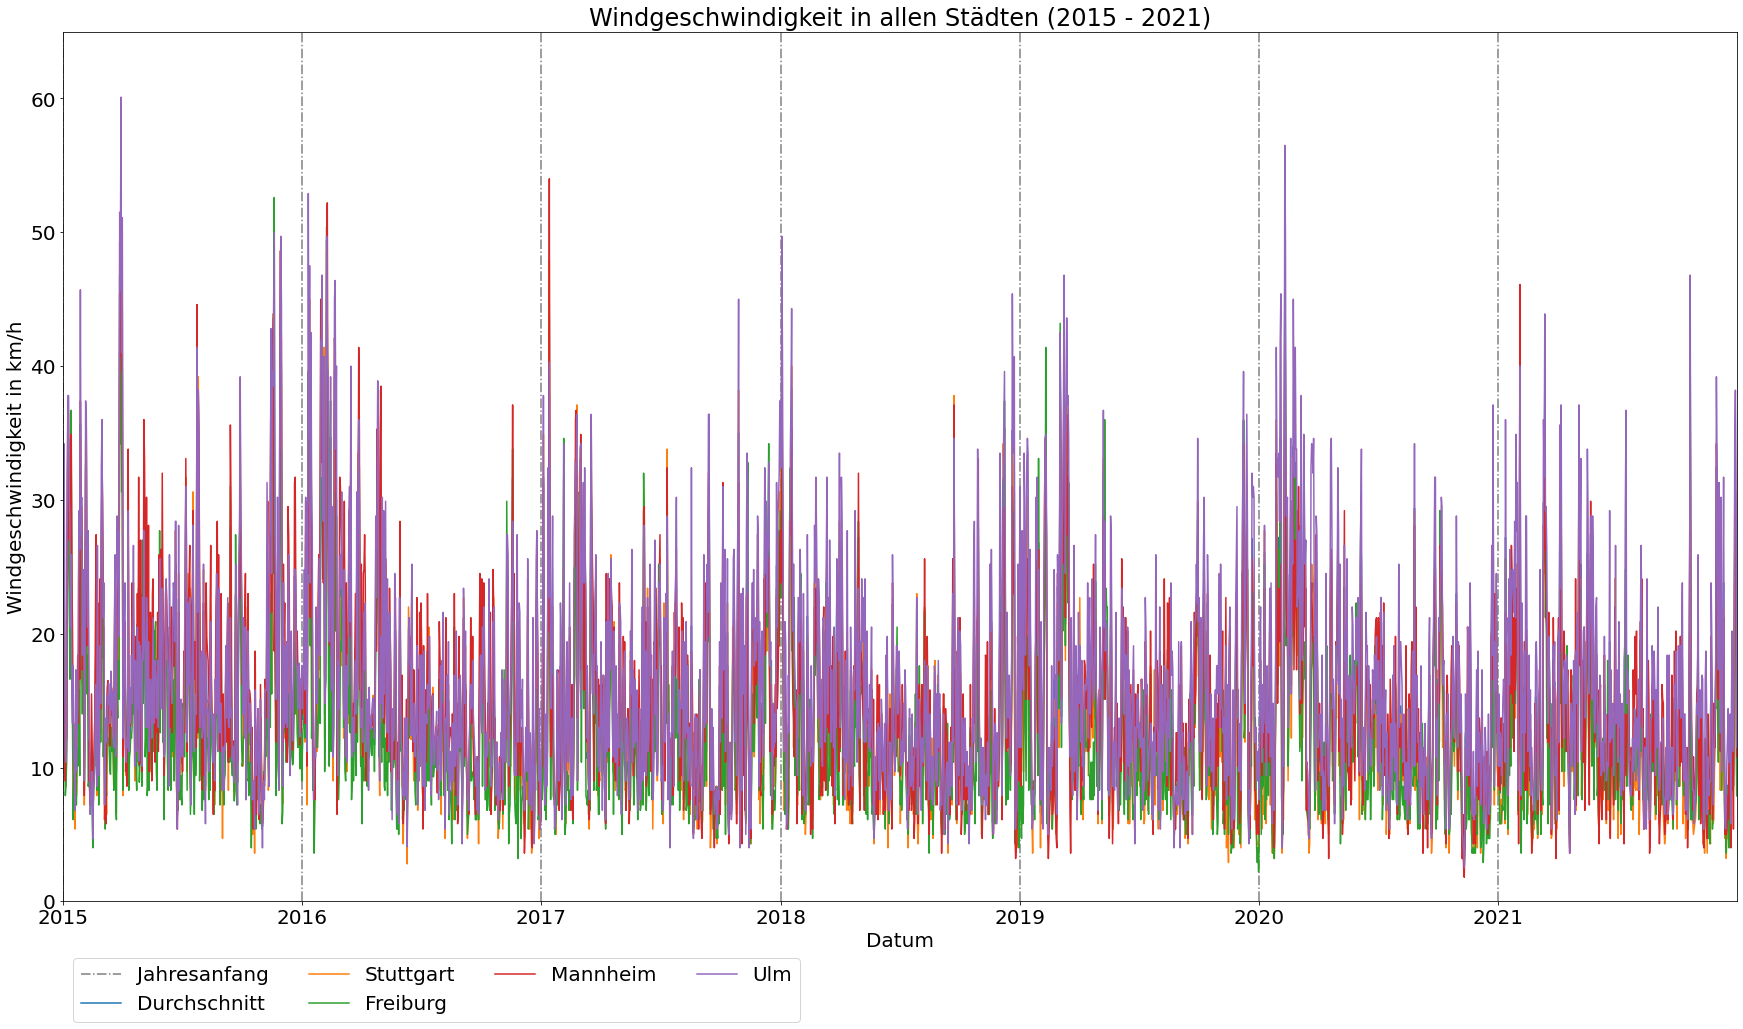



               count       mean       std  min   25%   50%   75%   max
stuttgart     2557.0  13.838443  7.363744  2.5   8.6  12.1  17.3  59.4
freiburg      2557.0  12.405514  6.513885  2.2   7.9  10.4  15.1  52.6
mannheim      2557.0  15.071803  7.193114  1.8  10.1  13.7  19.1  54.0
ulm           2557.0  16.356394  8.276111  2.5  10.4  14.0  20.2  60.1
durchschnitt  2557.0  14.417873  6.937618  2.5   9.5  12.8  17.6  55.1




In [5]:
#Jahre einzeichnen
functions.draw_years(df)

#Daten für jede Stadt und Durchschnitt plotten
plt.plot(df["durchschnitt"], label="Durchschnitt")
plt.plot(df["stuttgart"], label="Stuttgart");
plt.plot(df["freiburg"], label="Freiburg");
plt.plot(df["mannheim"], label="Mannheim");
plt.plot(df["ulm"], label="Ulm");

#Achsen und Layout
plt.title("Windgeschwindigkeit in allen Städten (2015 - 2021)")
plt.ylabel("Windgeschwindigkeit in km/h")
plt.ylim(0, 65)
plt.xlabel("Datum")
plt.xlim(dt.datetime(2015,1,1), dt.datetime(2021,12,31))

#Legende einfügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

plt.show()

#Deskriptive Statistiken
print("\n")
print(df.iloc[:,1:6].describe().transpose())
print("\n")



 2015 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




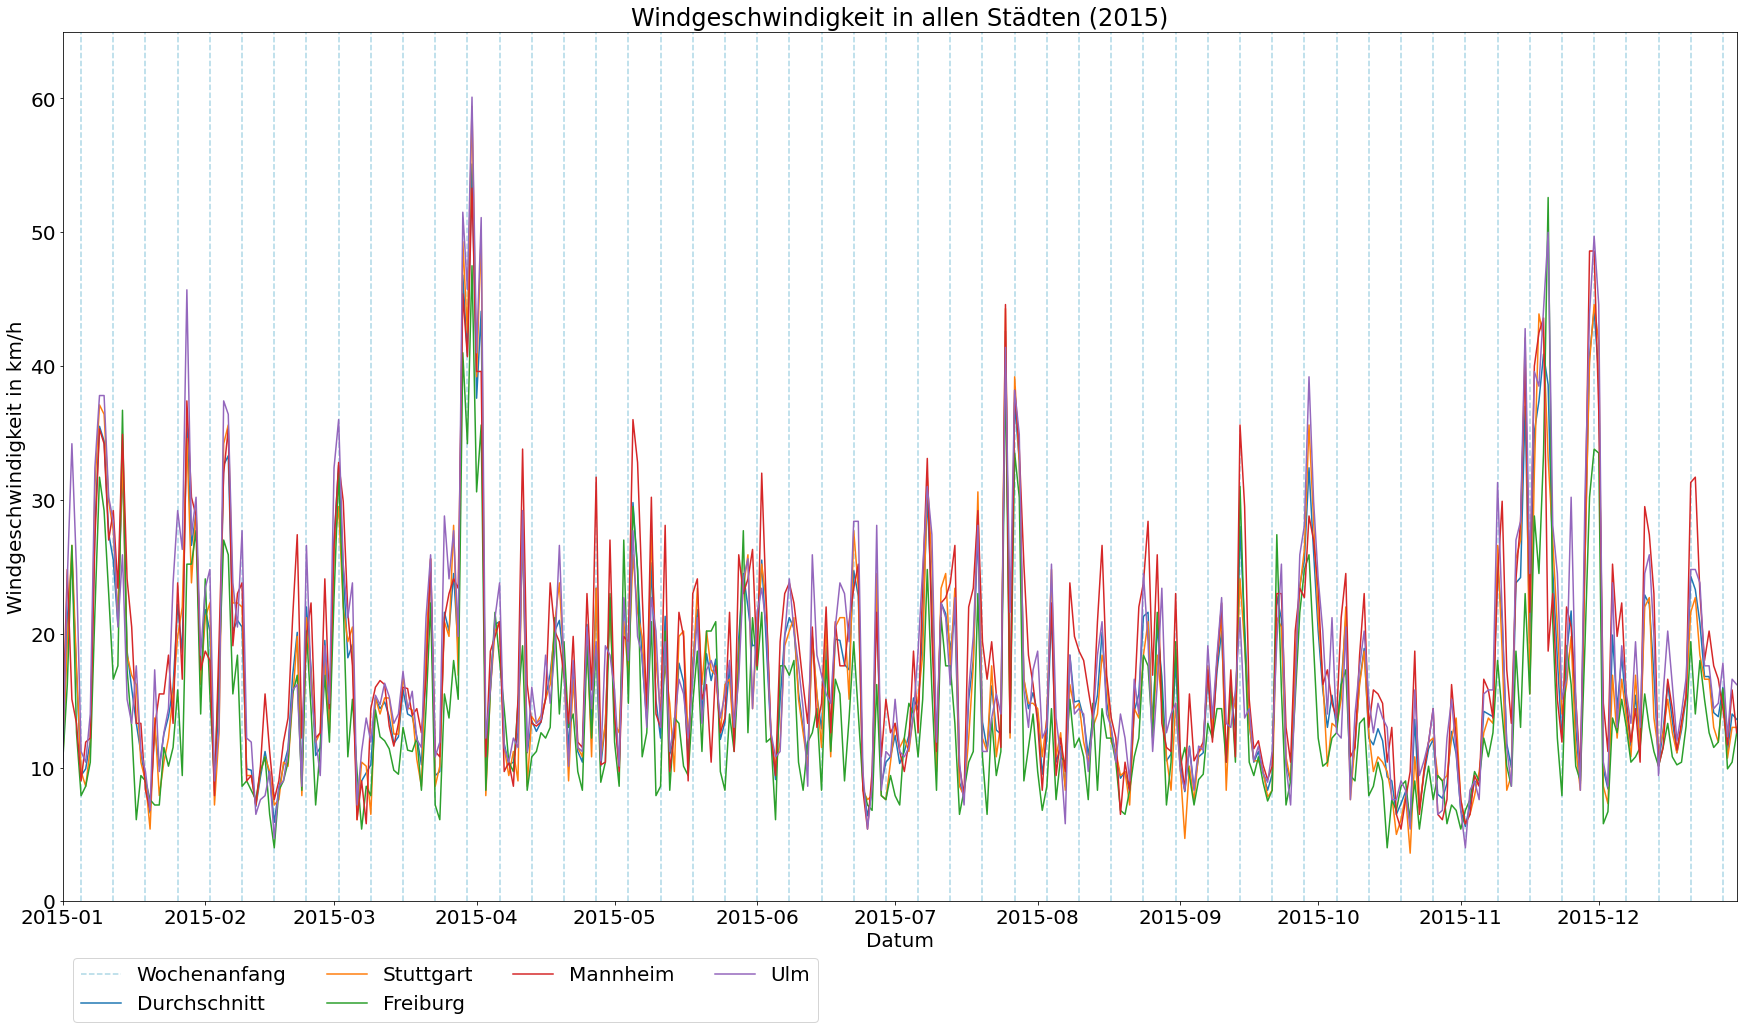



              count       mean       std  min   25%   50%   75%   max
stuttgart     365.0  16.683288  8.462225  3.6  10.8  14.4  20.5  59.4
freiburg      365.0  14.084110  7.113385  4.0   9.1  12.2  16.9  52.6
mannheim      365.0  18.259726  8.461623  5.4  11.9  16.2  23.0  53.3
ulm           365.0  18.041096  8.996370  4.0  11.9  15.7  22.3  60.1
durchschnitt  365.0  16.768767  7.858789  5.6  11.1  14.9  20.5  55.1




 2016 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




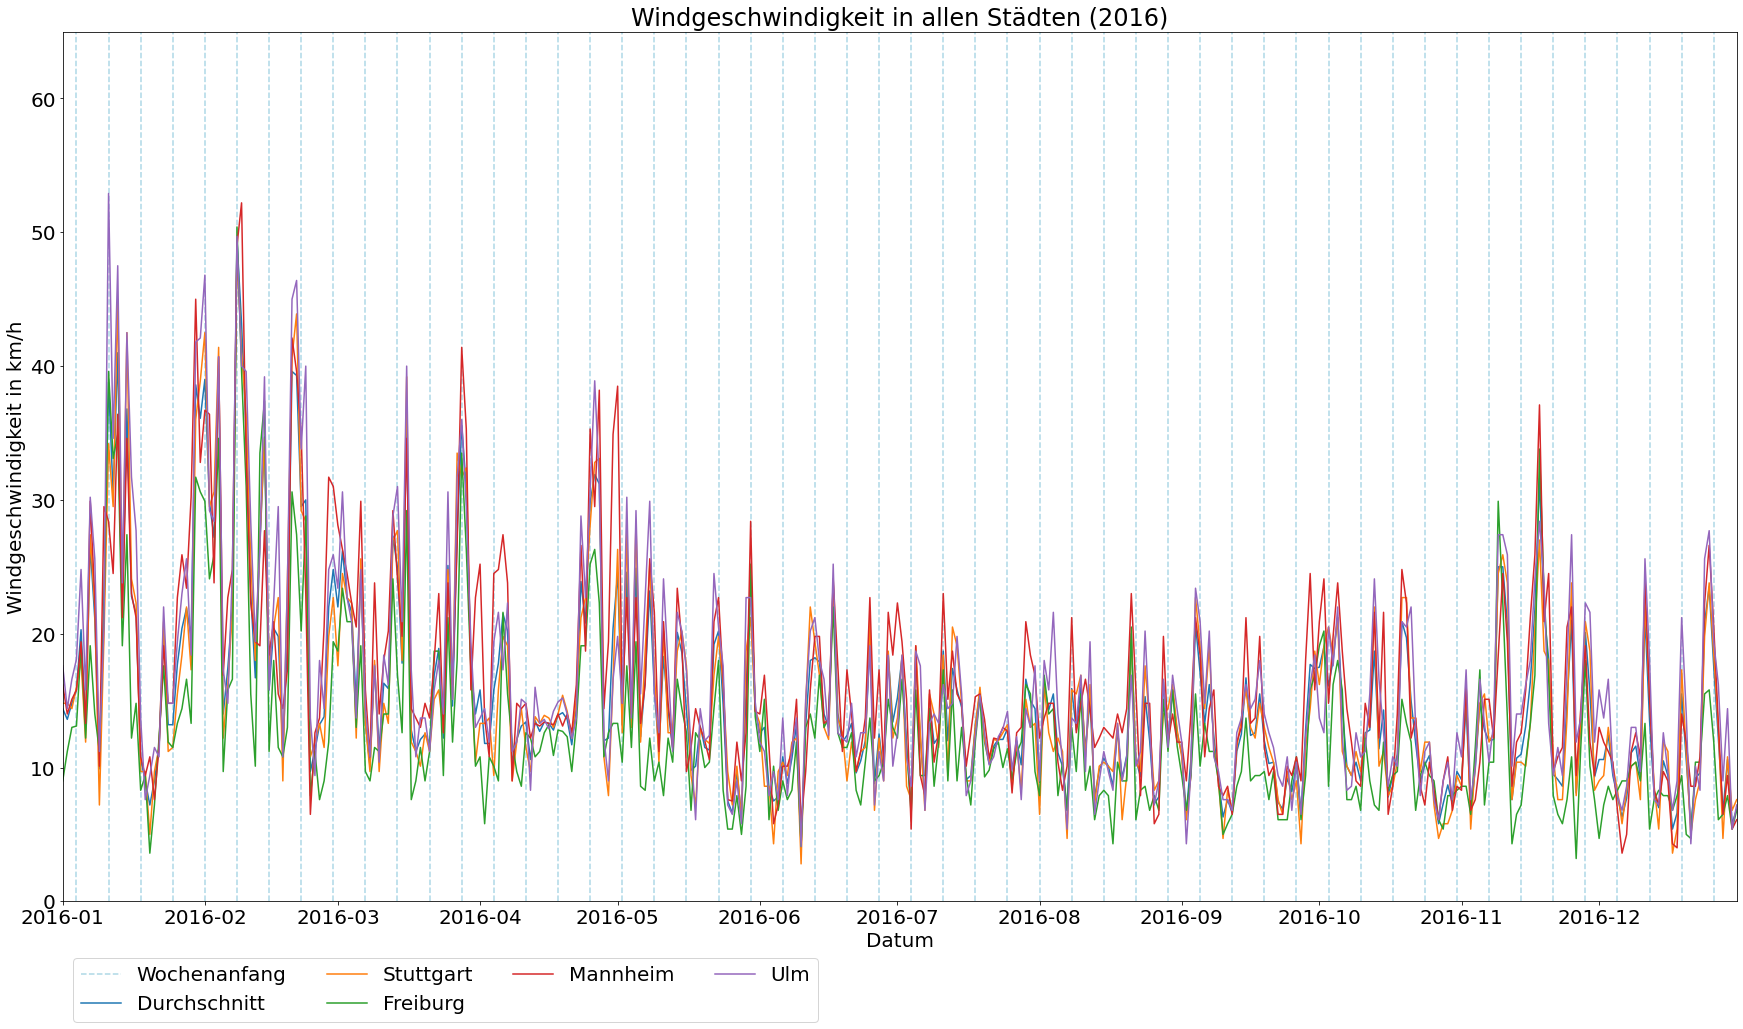



              count       mean       std  min   25%   50%     75%   max
stuttgart     366.0  15.206284  7.839006  2.8  10.1  13.0  18.700  48.6
freiburg      366.0  12.748907  6.717941  3.2   8.6  11.2  15.025  50.4
mannheim      366.0  16.577596  8.027138  3.6  11.2  14.4  20.900  52.2
ulm           366.0  16.627049  8.553433  4.1  10.8  14.2  20.200  52.9
durchschnitt  366.0  15.289071  7.370853  4.2  10.5  13.2  18.200  49.4




 2017 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




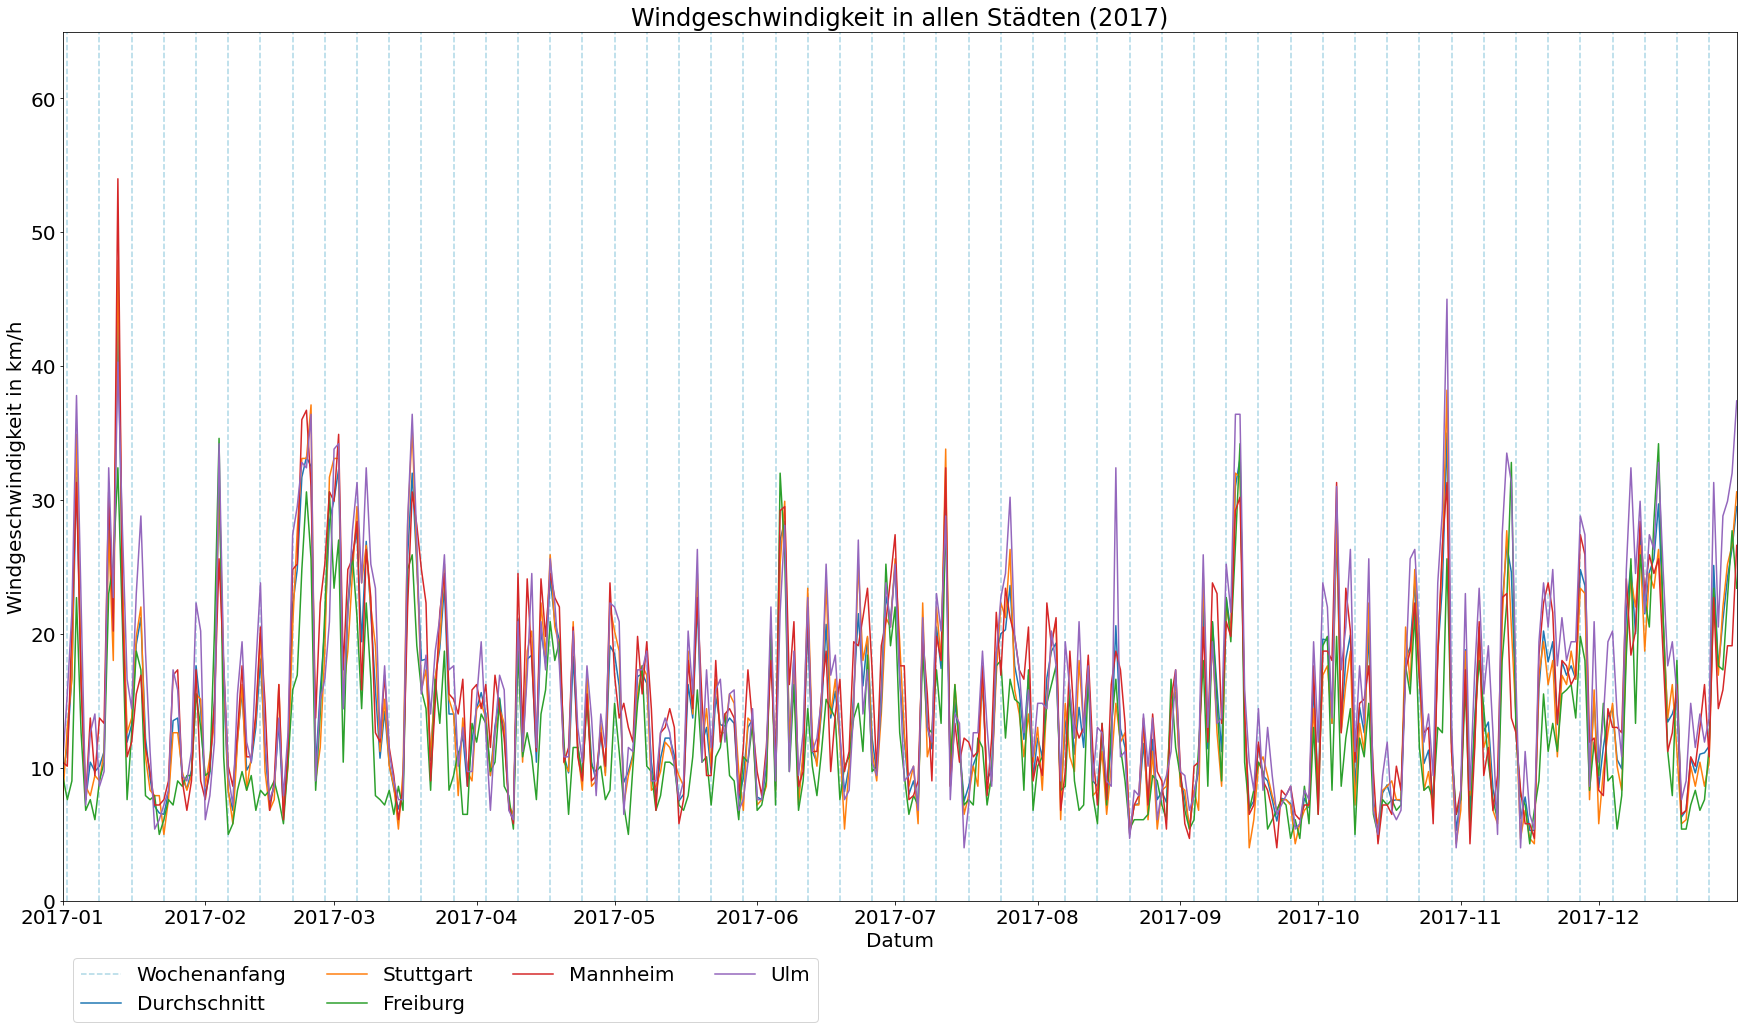



              count       mean       std  min   25%   50%   75%   max
stuttgart     365.0  14.540548  7.247785  4.0   8.6  12.6  18.7  47.9
freiburg      365.0  12.511233  6.243177  4.3   7.6  10.4  15.8  34.6
mannheim      365.0  15.259452  6.987528  4.0   9.7  14.0  19.4  54.0
ulm           365.0  16.327671  7.886132  4.0  10.1  14.4  20.9  45.0
durchschnitt  365.0  14.658082  6.708546  5.0   9.4  13.1  18.7  43.7




 2018 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




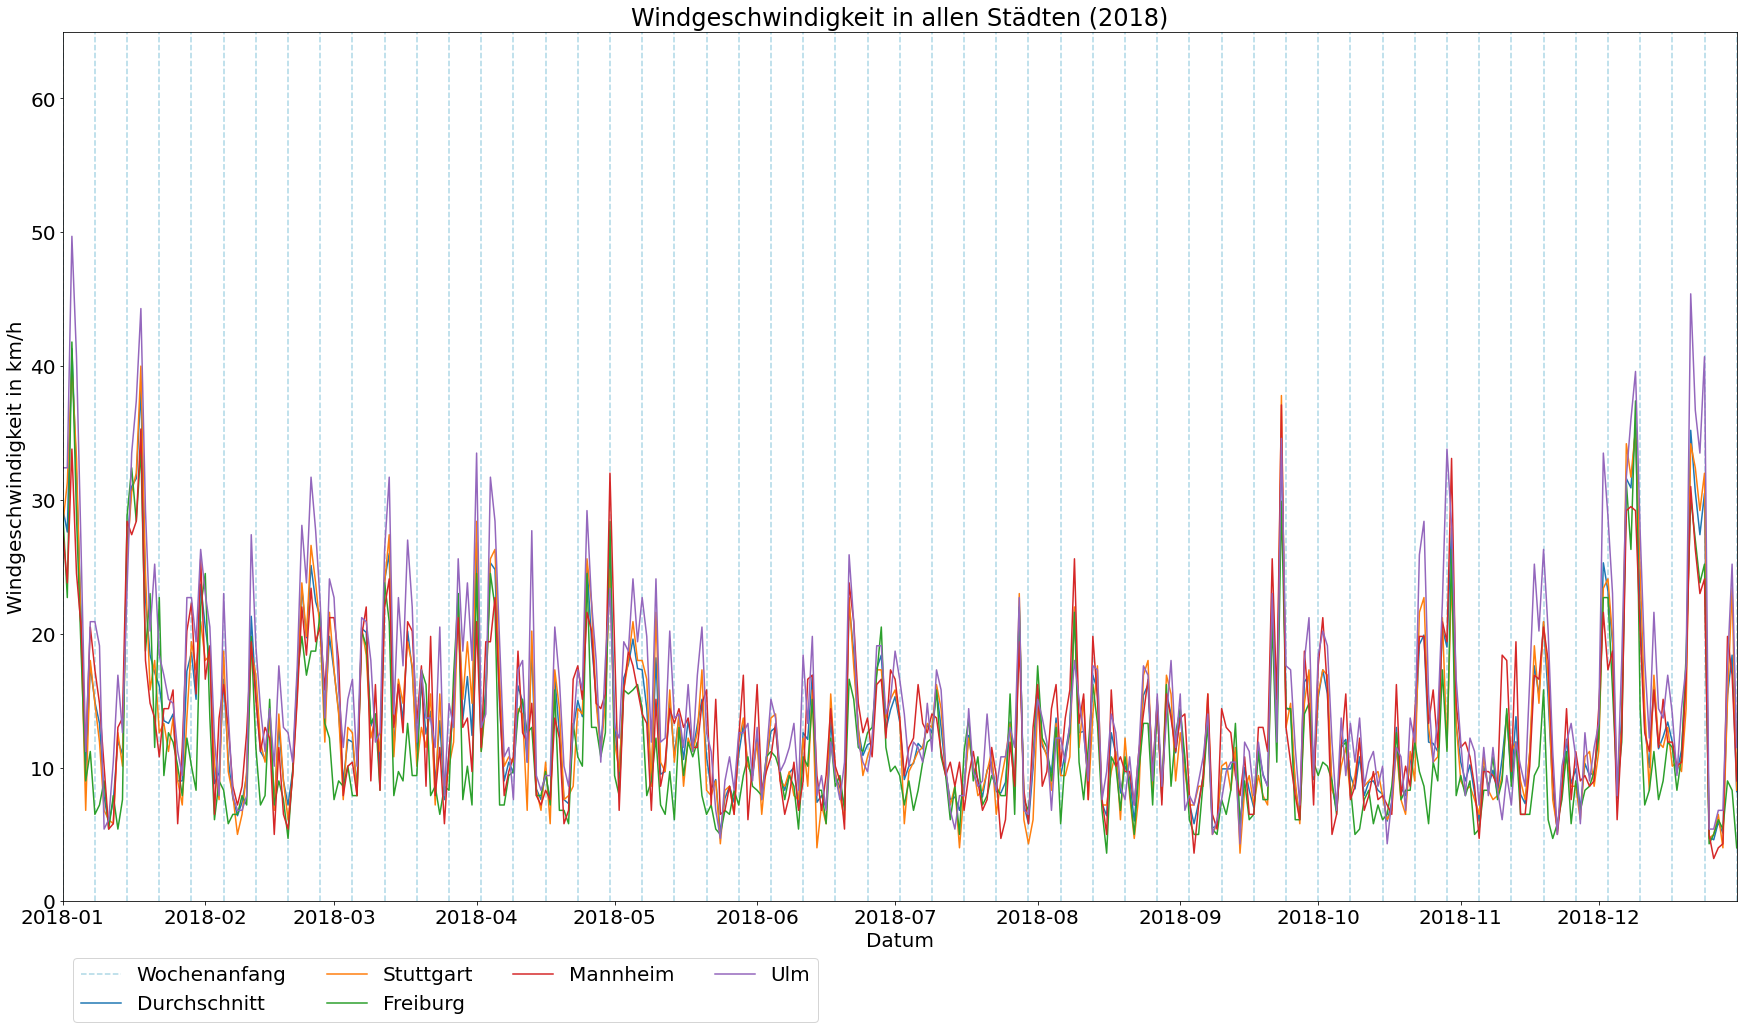



              count       mean       std  min   25%   50%   75%   max
stuttgart     365.0  13.143836  6.600978  3.6   8.6  11.2  15.8  40.0
freiburg      365.0  11.448767  6.018778  3.6   7.6   9.4  13.3  41.8
mannheim      365.0  13.394521  5.949252  3.2   9.0  12.6  16.2  37.1
ulm           365.0  15.320000  7.740067  4.3  10.1  13.0  18.7  49.7
durchschnitt  365.0  13.328219  6.202498  4.6   9.0  11.8  15.8  41.3




 2019 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




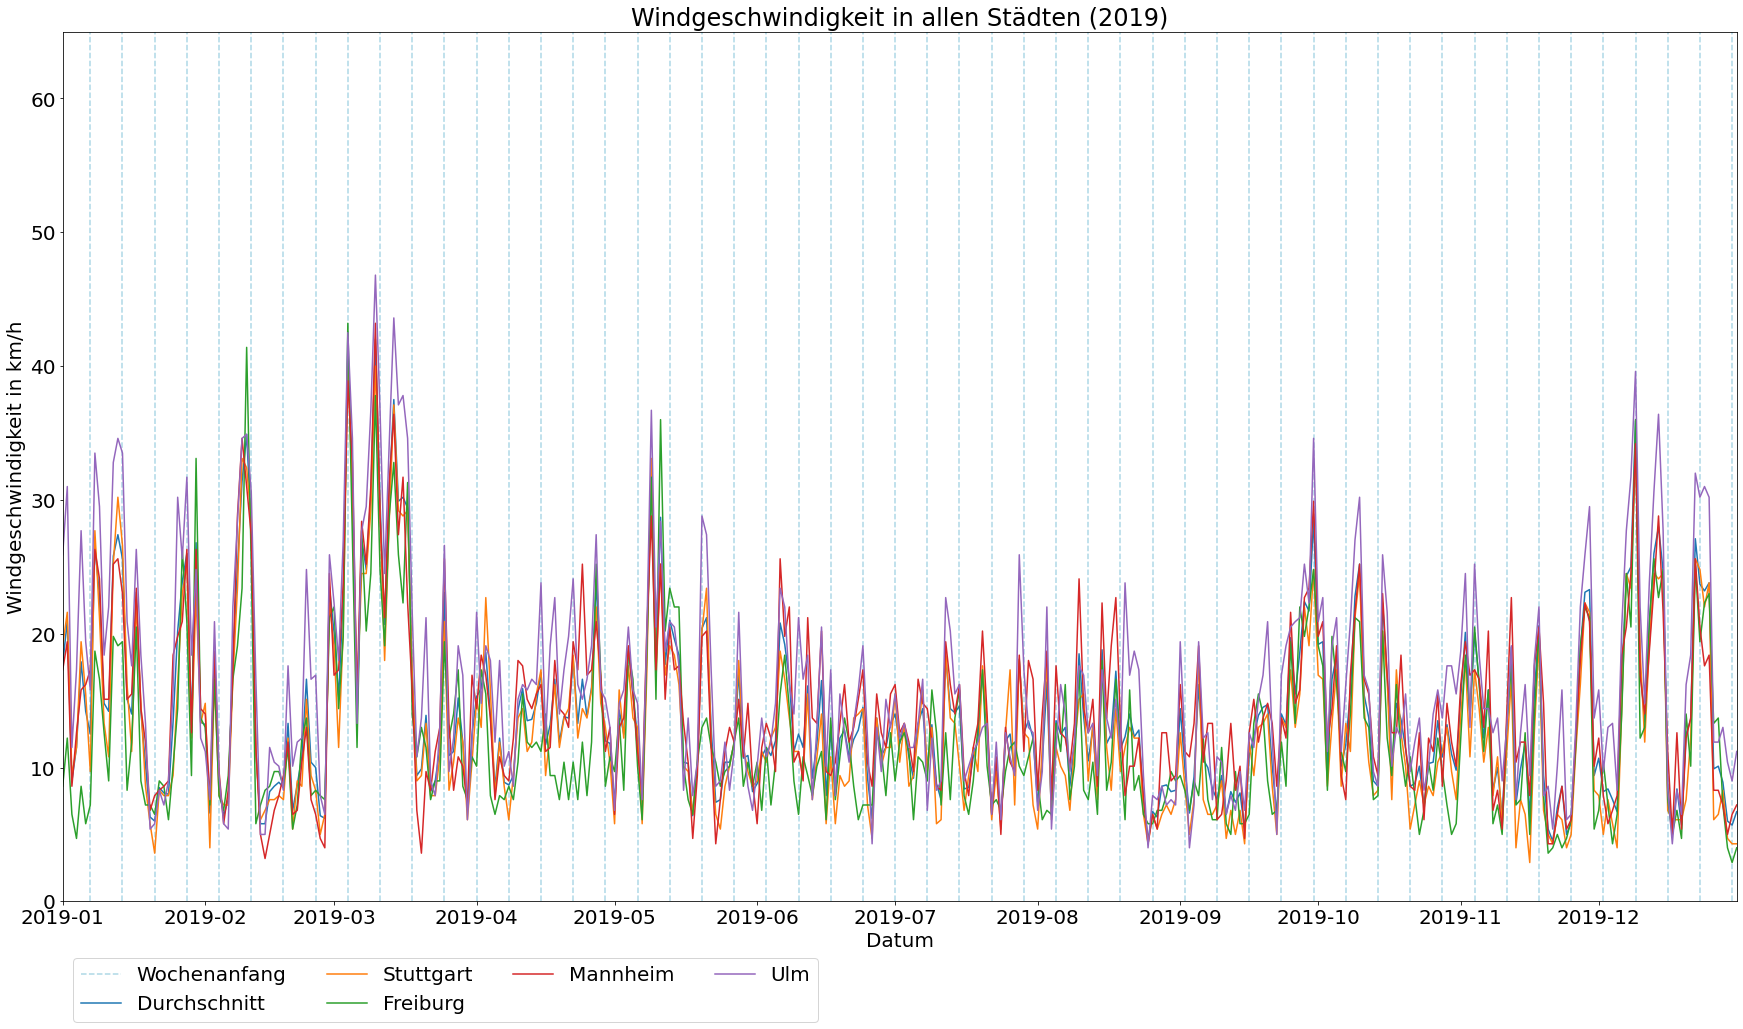



              count       mean       std  min   25%   50%   75%   max
stuttgart     365.0  12.971507  6.755255  2.9   7.9  11.5  16.2  40.7
freiburg      365.0  12.336986  6.580146  2.9   7.6  10.4  15.1  43.2
mannheim      365.0  14.424932  6.614329  3.2   9.7  13.3  17.6  43.2
ulm           365.0  16.381918  8.056037  4.0  10.4  14.8  20.5  46.8
durchschnitt  365.0  14.028219  6.626785  4.5   9.2  12.5  16.8  42.0




 2020 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




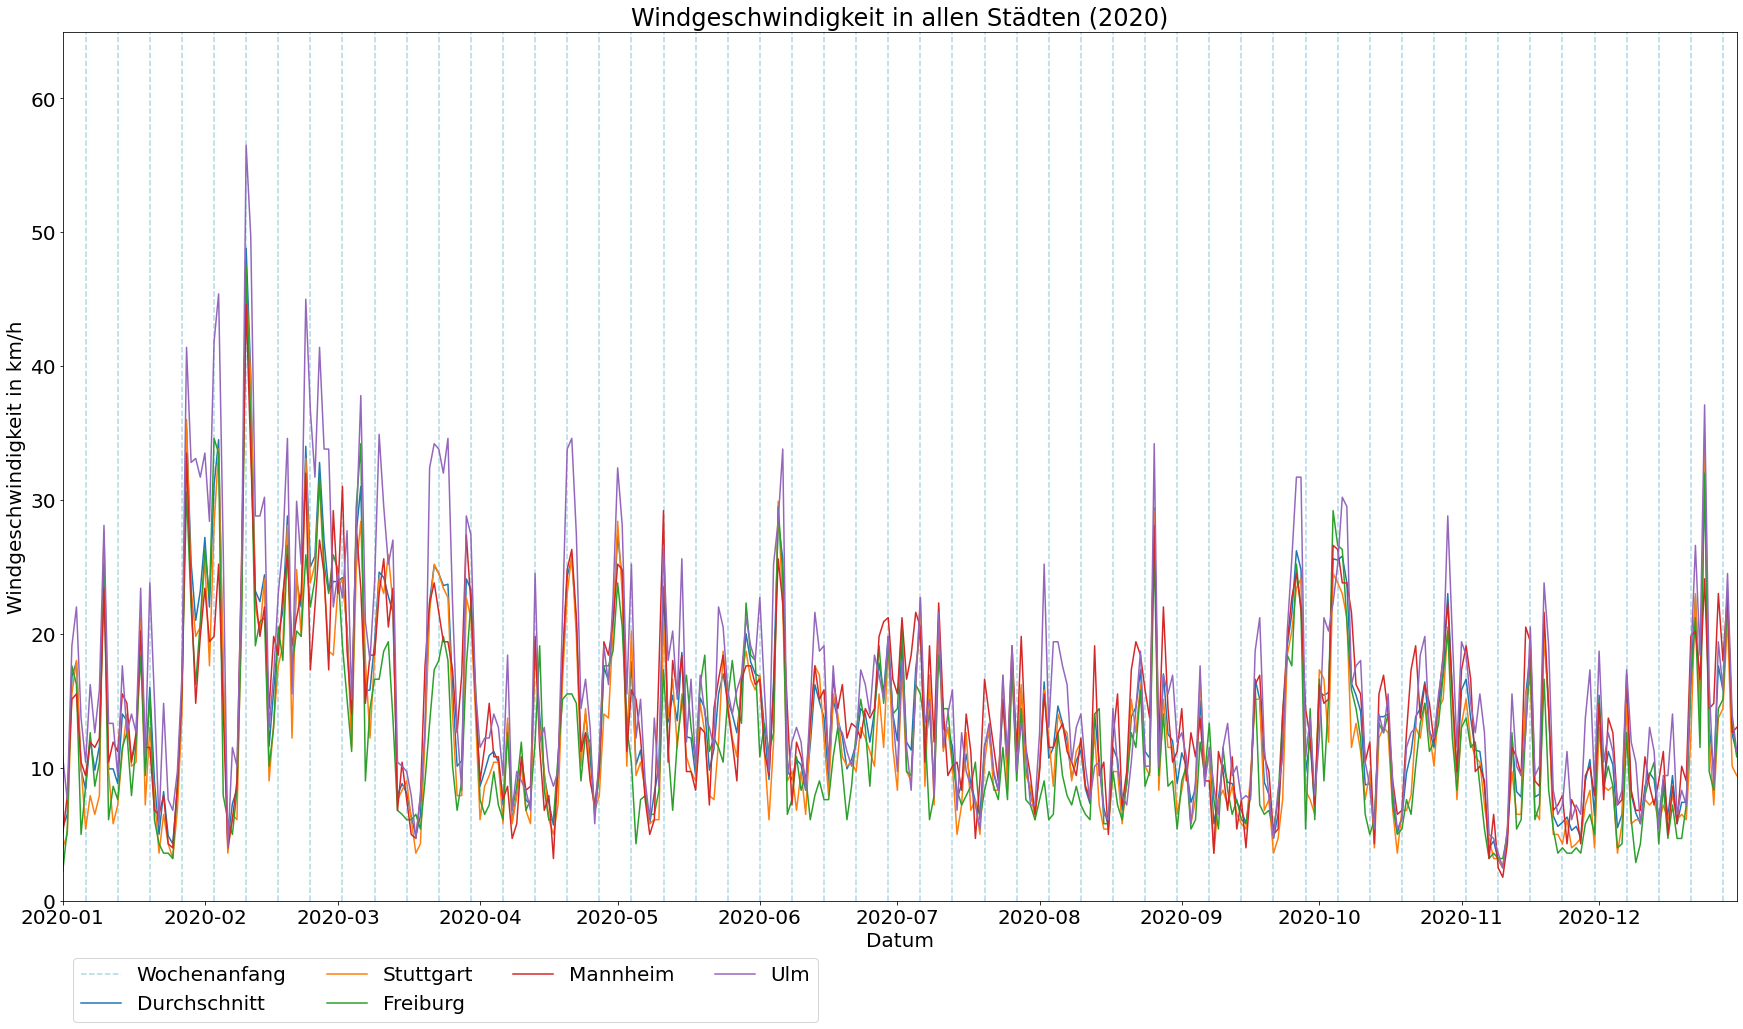



              count       mean       std  min   25%   50%    75%   max
stuttgart     366.0  12.636339  6.987309  2.5   7.6  10.8  16.60  46.4
freiburg      366.0  12.101913  6.736840  2.2   7.2  10.4  15.50  47.5
mannheim      366.0  14.161475  6.407232  1.8   9.4  13.3  18.40  44.6
ulm           366.0  16.208470  8.761451  2.5  10.1  13.7  19.80  56.5
durchschnitt  366.0  13.777596  6.875499  2.5   8.8  12.0  16.75  48.8




 2021 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




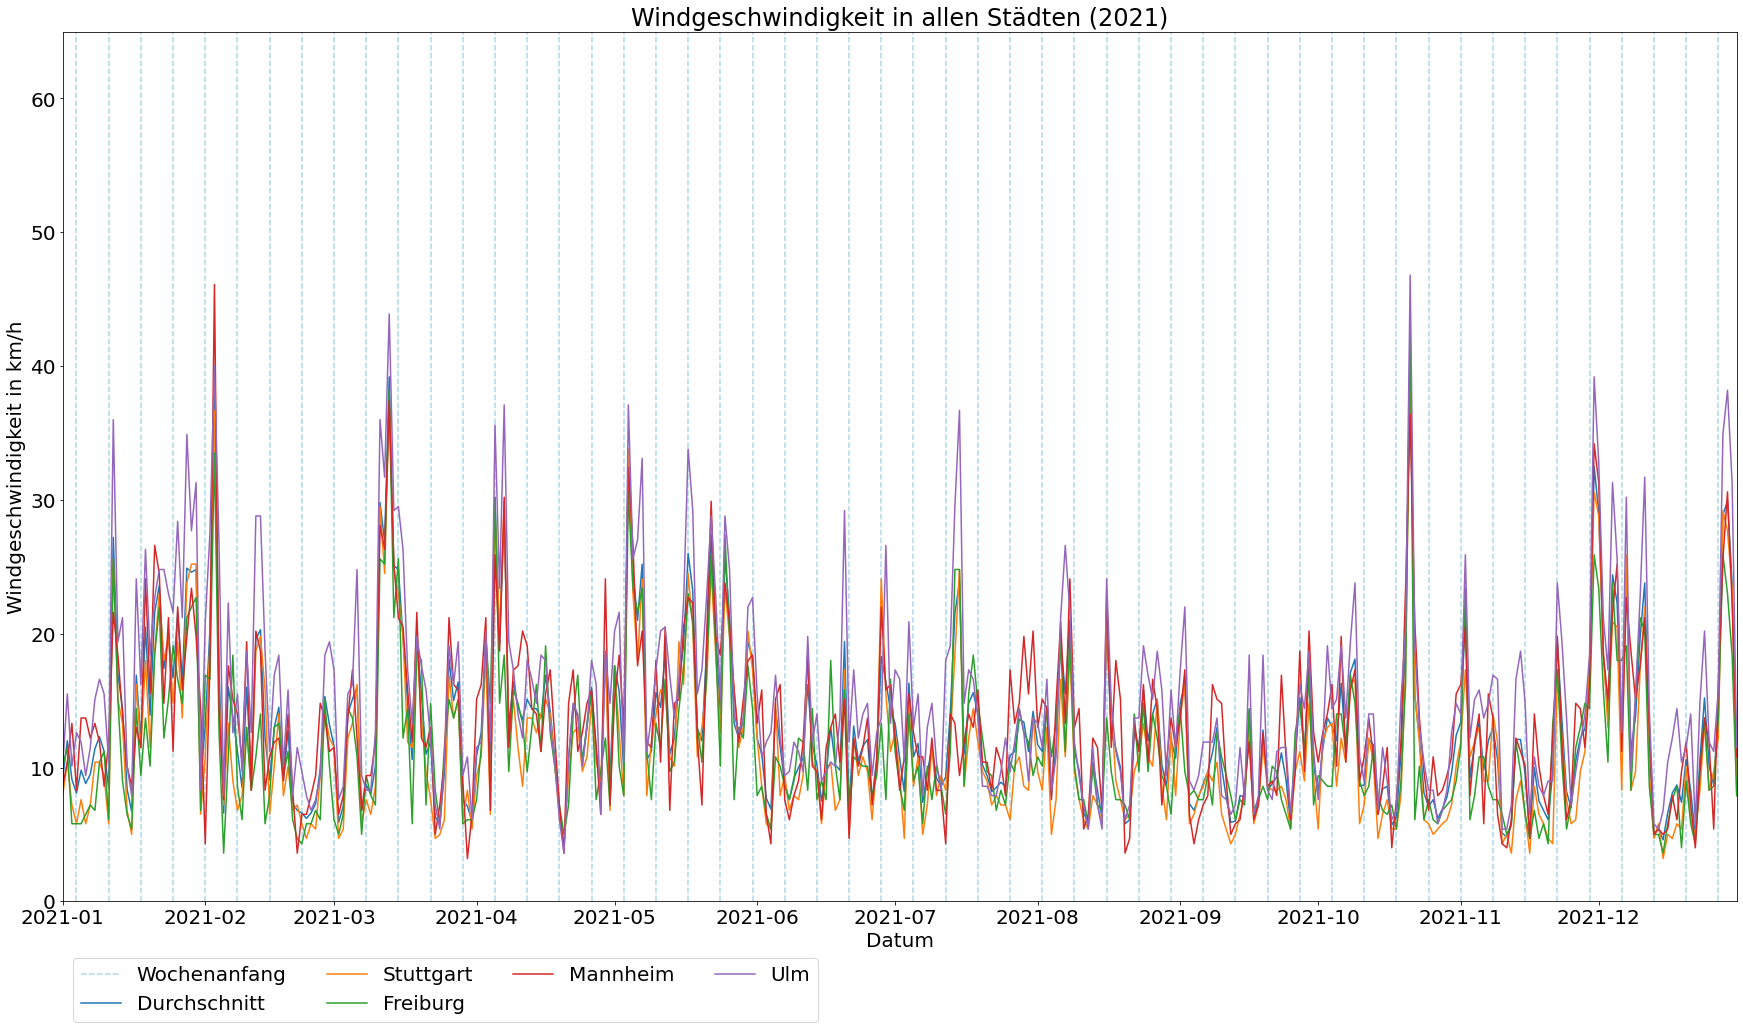



              count       mean       std  min   25%   50%   75%   max
stuttgart     365.0  11.686849  6.246594  3.2   7.2  10.1  14.0  40.7
freiburg      365.0  11.606575  5.785413  3.6   7.6  10.1  14.4  43.2
mannheim      365.0  13.423288  6.218811  3.2   9.0  12.2  16.2  46.1
ulm           365.0  15.588219  7.621106  3.6  10.1  14.0  18.7  46.8
durchschnitt  365.0  13.074521  6.083795  4.0   8.8  11.6  15.5  41.8




In [6]:
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    
    print("\n\n", str(year), "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
    #Untere und obere Grenze zum Filtern des DataFrames nach jeweiligem Jahr
    lower_border = str(year) + "-01-01"
    upper_border = str(year) + "-12-31"
    
    #Wochen einzeichnen
    functions.draw_weeks(df[lower_border:upper_border])
    
    #Daten für jede Stadt und Durchschnitt plotten
    plt.plot(df[lower_border:upper_border]["durchschnitt"], label="Durchschnitt")
    plt.plot(df[lower_border:upper_border]["stuttgart"], label="Stuttgart");
    plt.plot(df[lower_border:upper_border]["freiburg"], label="Freiburg");
    plt.plot(df[lower_border:upper_border]["mannheim"], label="Mannheim");
    plt.plot(df[lower_border:upper_border]["ulm"], label="Ulm");
    
    #Achsen und Layout
    plt.title("Windgeschwindigkeit in allen Städten (" + str(year) + ")")
    plt.ylabel("Windgeschwindigkeit in km/h")
    plt.ylim(0, 65)
    plt.xlabel("Datum")
    plt.xlim(dt.datetime(year,1,1), dt.datetime(year,12,31))
    
    #Legende einfügen
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

    plt.show()
    
    #Deskriptive Statistiken
    print("\n")
    print(df[lower_border:upper_border].iloc[:,1:6].describe().transpose())
    print("\n")

<font size="5">Die Korrelationskoeffizienten zeigen, dass die vier Städte allesamt stark mit dem Durchschnitt korrelieren. Die Korrelationen sind in allen Fällen ähnlich stark. Daher kann der Durchschnitt über alle Städte für die weiteren Analysen verwendet werden.</font>

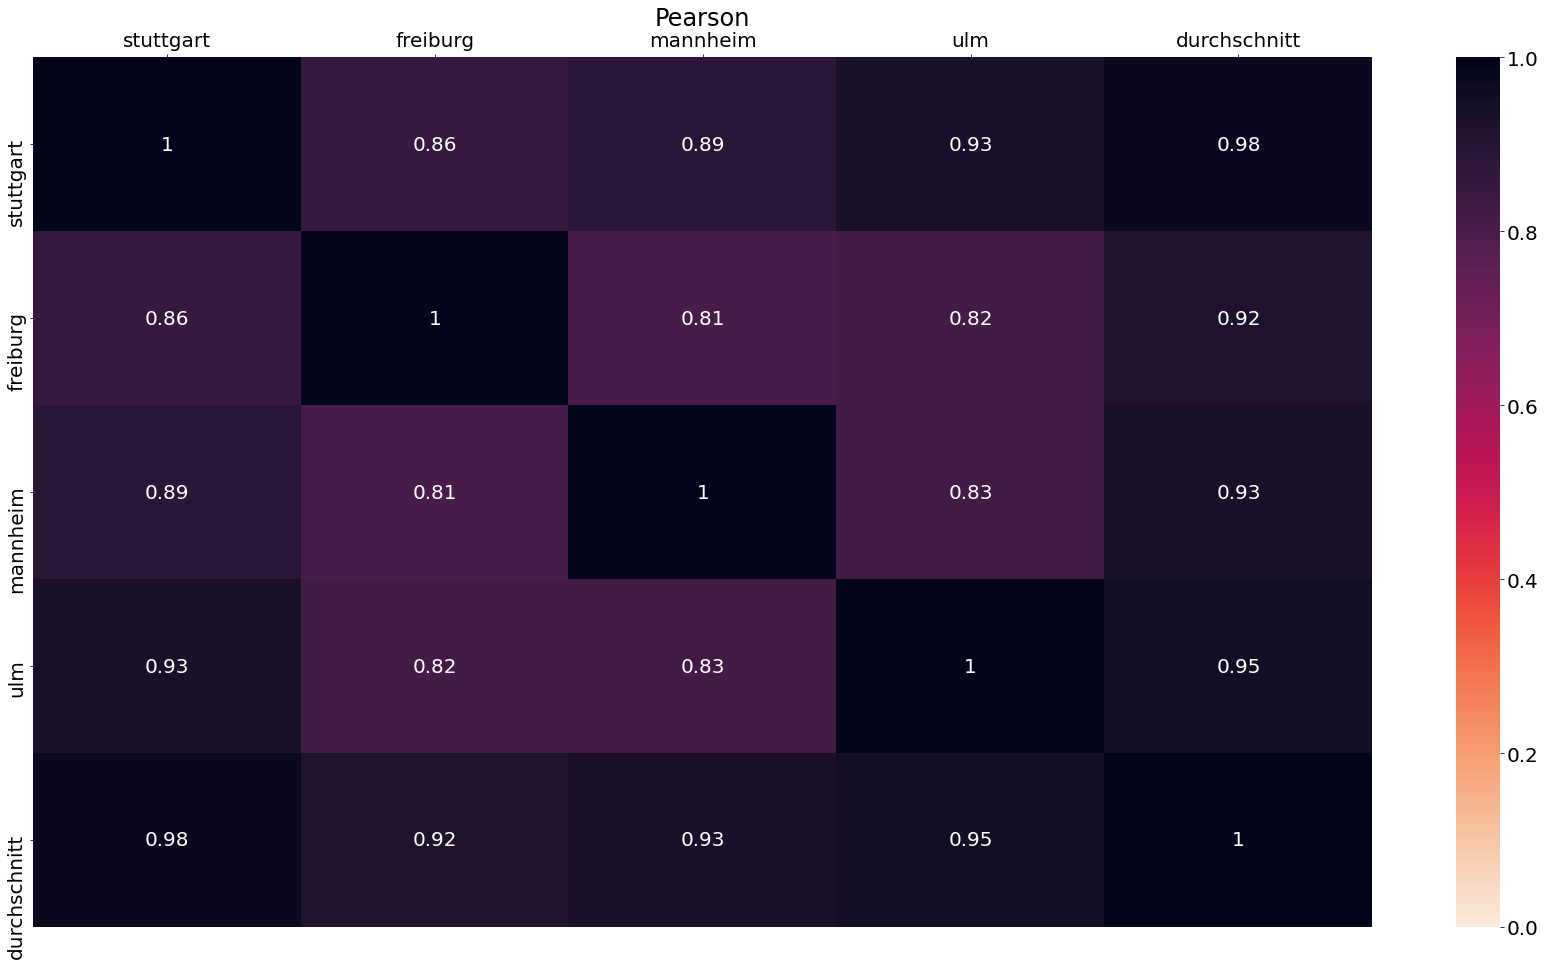

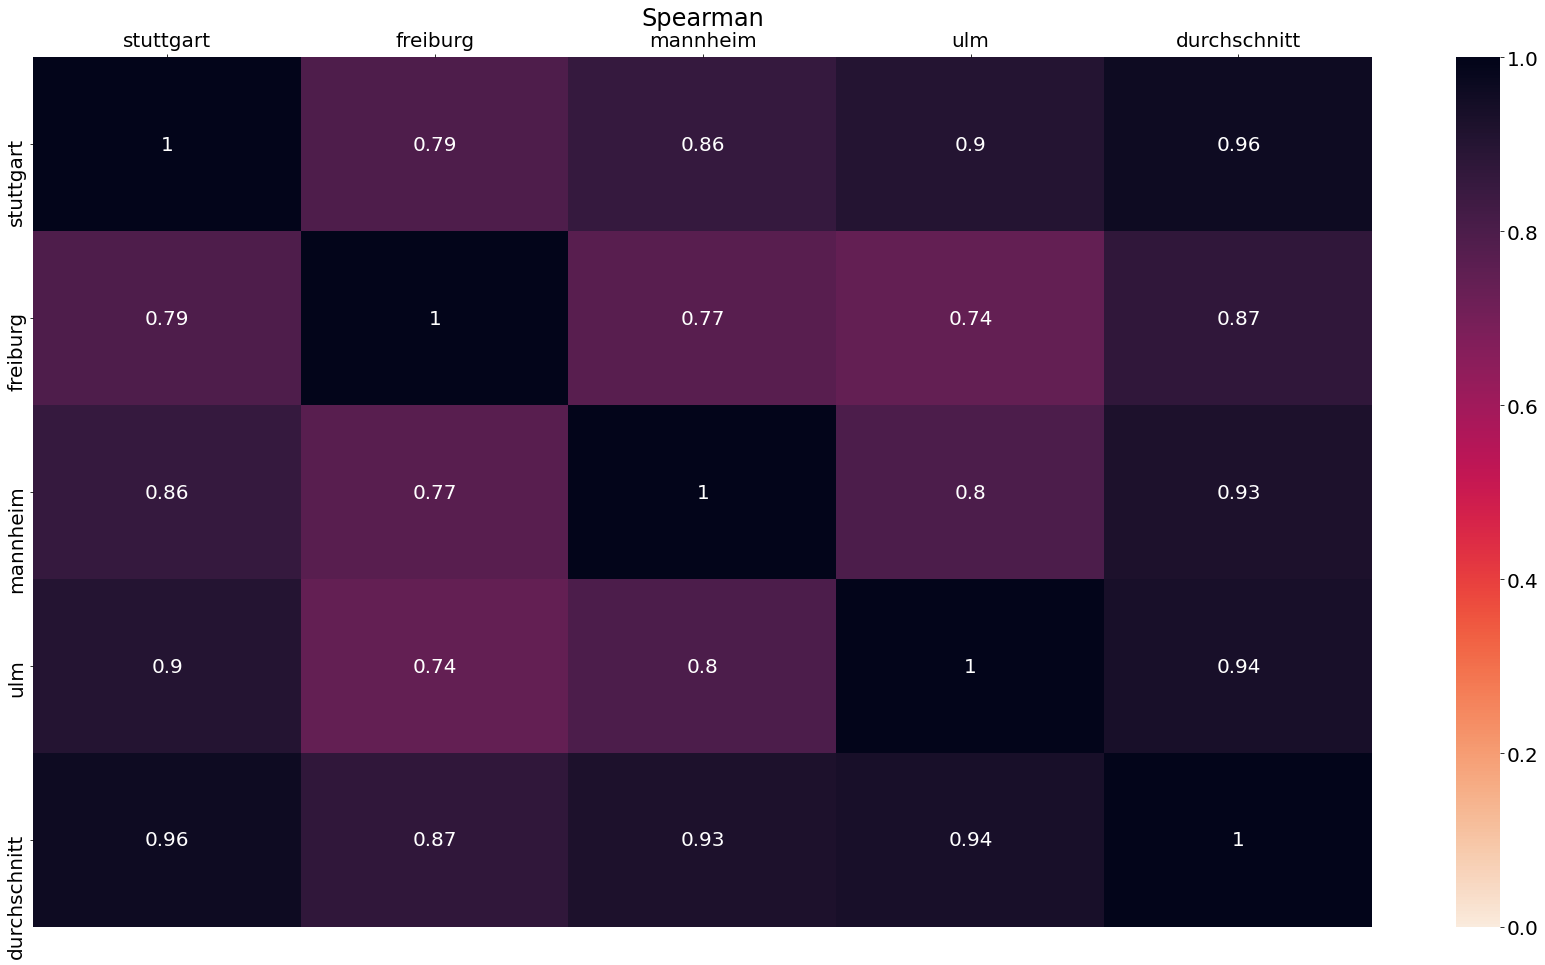

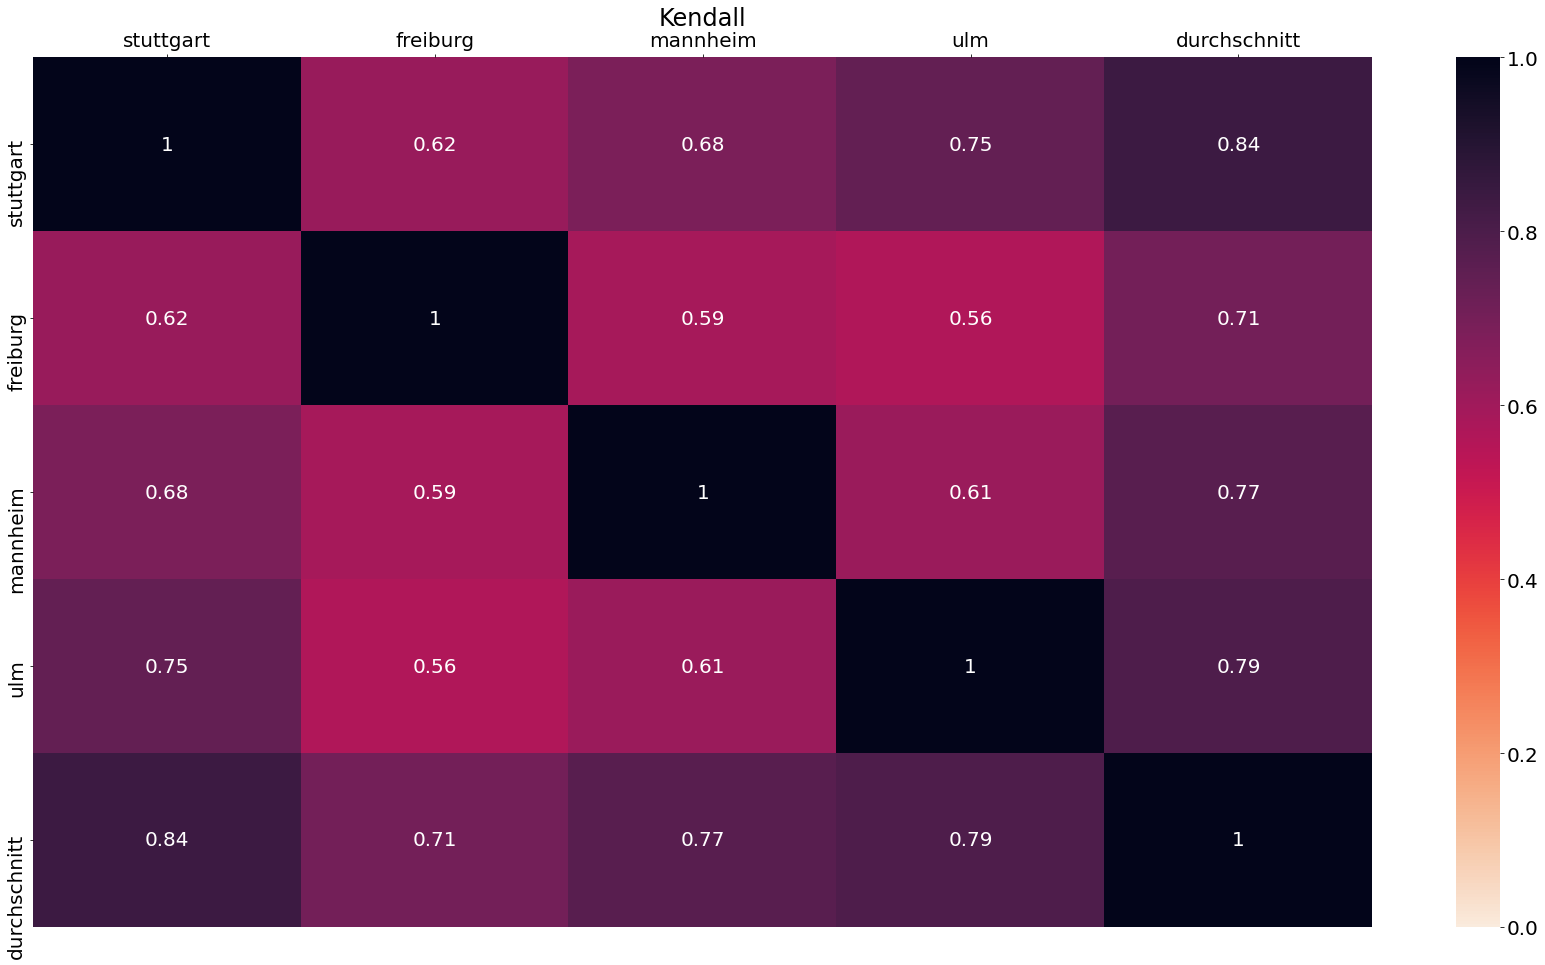

In [7]:
#Heatmap der Korrelationen untereinander (Pearson)
ax = sns.heatmap(data=df.corr(method="pearson"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Pearson")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Spearman)
ax = sns.heatmap(data=df.corr(method="spearman"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Spearman")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Kendall)
ax = sns.heatmap(data=df.corr(method="kendall"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Kendall")
ax.xaxis.set_ticks_position("top")

plt.show()

# <font size="7">Fazit</font>
<font size="5">Die Werte der einzelnen Städte sind untereinander etwas schwächer korreliert, bewegen sich allerdings synchron und sind ausreichend stark mit dem Durchschnitt korreliert. Daher wird im Folgenden nun noch der Durchschnitt über alle Städte verwendet.</font>